In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

genderclassmodel.csv
gendermodel.csv
gendermodel.py
myfirstforest.py
test.csv
train.csv



In [17]:
data_train=pd.read_csv('../input/train.csv')
data_test=pd.read_csv('../input/test.csv')


print('Survived',np.size(data_train['Survived'].nonzero()), 'out of',np.size(data_train['Survived']))
data_train[0:3]


Survived 342 out of 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


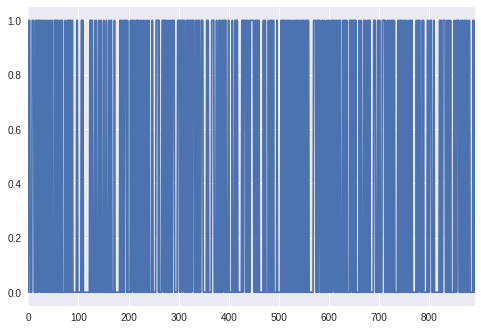

In [27]:
data_train['Survived'].plot()


In [38]:
data_y=data_train['Survived']
data_y.shape

(891,)

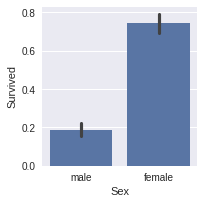

In [20]:
import seaborn as sns
g = sns.FacetGrid(data_train, row=None, col=None)
g.map(sns.barplot,'Sex','Survived')

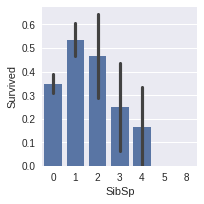

In [23]:
g = sns.FacetGrid(data_train, row=None, col=None)
g.map(sns.barplot,'SibSp','Survived')

In [42]:
#Series is a one-dimensional labeled array capable of holding any data type 
#(integers, strings, floating point numbers, Python objects, etc.). 
#The axis labels are collectively referred to as the index. 
#The basic method to create a Series is to call:
# s = pd.Series(data, index=index)

#If x and y are given and input arrays are 1-D, where is equivalent to:
#[xv if c else yv for (c,xv,yv) in zip(condition,x,y)]

sex = pd.Series( np.where( data_train.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [45]:
sex.shape

(891,)

In [49]:
#sex.reshape(-1, 1)
sex.shape

/opt/conda/bin/ipython:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  #!/opt/conda/bin/python


(891,)

In [54]:
Pclass=data_train.Pclass
Pclass.shape

(891,)

In [55]:
data_x=pd.concat( [sex,Pclass],axis=1)
data_x.head()

,Sex,Pclass
0,1,3
1,0,1
2,0,3
3,0,1
4,1,3


In [56]:
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression()
logreg.fit(data_x,data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)